In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.tsa.deterministic import DeterministicProcess, Fourier

from MLBDataFetcher import MLBDataFetcher
from preprocess import Att_Analysis
from InterruptedTimeSeries import ITS, MITS

# 中断時系列分析をする

## データ準備

In [14]:
att_remove_covid_addup = Att_Analysis(is_remove_covid=True, is_addup=True)
df_att_remove_covid_addup = att_remove_covid_addup.get_monthly_all_df()

In [15]:
df_att_remove_covid_addup

,Attendance
2012-04,10085795
2012-05,12788090
2012-06,13484221
2012-07,12412394
2012-08,12942643
2012-09,13146125
2013-04,11327161
2013-05,12423877
2013-06,12753480
2013-07,12406872


## 分析

In [16]:
its_periodical_OLS = MITS(df_att_remove_covid_addup, interventions=['2015-05', '2019-04', '2023-04'], method='Periodic OLS', period=6, order=3)
its_OLS = ITS(df_att_remove_covid_addup, intervention='2023-04', method='OLS', interaction=False)
its_periodical_OLS.show_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     8.933
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.44e-08
Time:                        17:58:54   Log-Likelihood:                -876.89
No. Observations:                  60   AIC:                             1780.
Df Residuals:                      47   BIC:                             1807.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.275e+07   2.93e+05     43.571      0.000    1.22e+07    1.33e+07
time since start -4.567e+04   2.57e+04     -1.777      0.082   -9.74e+04    6025.593
level change 0     8.35e+05    3.8e+05      2.196      0.033    7.01e+04     1.6e+06
slope change 0   -5703.8498   3.19e+04     -0.179      0.859   -6.98e+04    5.84e+04
level change 1    8.308e+04   4.61e+05      0.180      0.858   -8.43e+05    1.01e+06
slope change 1   -3.034e+04   5.53e+04     -0.549      0.586   -1.42e+05    8.09e+04
level change 2    1.464e+06   6.99e+05      2.093      0.042    5.71e+04    2.87e+06
slope change 2   -7191.2958   1.59e+05     -0.045      0.964   -3.26e+05    3.12e+05
sin(1,6)         -2.881e+05   1.18e+05     -2.446      0.018   -5.25e+05   -5.12e+04
cos(1,6)         -6.385e+05   1.13e+05     -5.657      0.000   -8.66e+05   -4.11e+05
sin(2,6)         -6.424e+04   1.12e+05     -0.575      0.568   -2.89e+05    1.61e+05
cos(2,6)         -6.304e+05   1.13e+05     -5.585      0.000   -8.57e+05   -4.03e+05
sin(3,6)          2.462e-08   1.62e-08      1.523      0.135    -7.9e-09    5.71e-08
cos(3,6)         -1.015e+05   7.92e+04     -1.282      0.206   -2.61e+05    5.77e+04
==============================================================================
Omnibus:                        3.060   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.758
Skew:                           0.008   Prob(JB):                        0.252
Kurtosis:                       4.050   Cond. No.                     4.30e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
# its.plot_predict(is_counterfactual=True, is_prediction_std=True)
its_OLS.fit_slope_after_intervention()

                            OLS Regression Results                            
Dep. Variable:             Attendance   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     4.393
Date:                Mon, 23 Oct 2023   Prob (F-statistic):            0.00760
Time:                        17:58:54   Log-Likelihood:                -906.19
No. Observations:                  60   AIC:                             1820.
Df Residuals:                      56   BIC:                             1829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.267e+07   2.44e+05     51.980   

,Attendance,time since start,level change 0,slope change 0,level change 1,slope change 1,level change 2,slope change 2,level change,slope change,t(1-xt),t*xt
2012-04,10085795,0,0,0,0,0,0,0,0,0,0,0
2012-05,12788090,1,0,0,0,0,0,0,0,0,1,0
2012-06,13484221,2,0,0,0,0,0,0,0,0,2,0
2012-07,12412394,3,0,0,0,0,0,0,0,0,3,0
2012-08,12942643,4,0,0,0,0,0,0,0,0,4,0
2012-09,13146125,5,0,0,0,0,0,0,0,0,5,0
2013-04,11327161,6,0,0,0,0,0,0,0,0,6,0
2013-05,12423877,7,0,0,0,0,0,0,0,0,7,0
2013-06,12753480,8,0,0,0,0,0,0,0,0,8,0
2013-07,12406872,9,0,0,0,0,0,0,0,0,9,0


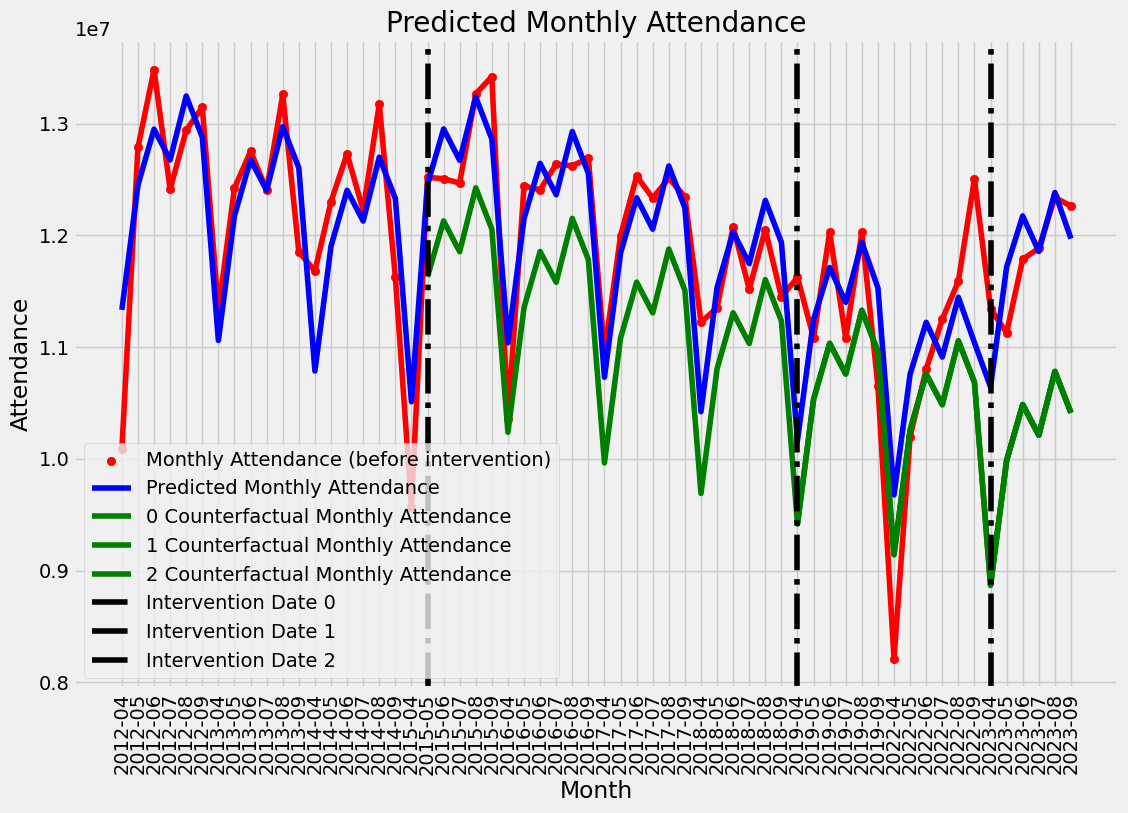

In [20]:
its_periodical_OLS.plot_predict(is_counterfactual=True)

In [19]:
its_periodical_OLS.show_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     8.933
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.44e-08
Time:                        17:59:18   Log-Likelihood:                -876.89
No. Observations:                  60   AIC:                             1780.
Df Residuals:                      47   BIC:                             1807.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.275e+07   2.93e+05     43.571      0.000    1.22e+07    1.33e+07
time since start -4.567e+04   2.57e+04     -1.777      0.082   -9.74e+04    6025.593
level change 0     8.35e+05    3.8e+05      2.196      0.033    7.01e+04     1.6e+06
slope change 0   -5703.8498   3.19e+04     -0.179      0.859   -6.98e+04    5.84e+04
level change 1    8.308e+04   4.61e+05      0.180      0.858   -8.43e+05    1.01e+06
slope change 1   -3.034e+04   5.53e+04     -0.549      0.586   -1.42e+05    8.09e+04
level change 2    1.464e+06   6.99e+05      2.093      0.042    5.71e+04    2.87e+06
slope change 2   -7191.2958   1.59e+05     -0.045      0.964   -3.26e+05    3.12e+05
sin(1,6)         -2.881e+05   1.18e+05     -2.446      0.018   -5.25e+05   -5.12e+04
cos(1,6)         -6.385e+05   1.13e+05     -5.657      0.000   -8.66e+05   -4.11e+05
sin(2,6)         -6.424e+04   1.12e+05     -0.575      0.568   -2.89e+05    1.61e+05
cos(2,6)         -6.304e+05   1.13e+05     -5.585      0.000   -8.57e+05   -4.03e+05
sin(3,6)          2.462e-08   1.62e-08      1.523      0.135    -7.9e-09    5.71e-08
cos(3,6)         -1.015e+05   7.92e+04     -1.282      0.206   -2.61e+05    5.77e+04
==============================================================================
Omnibus:                        3.060   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.758
Skew:                           0.008   Prob(JB):                        0.252
Kurtosis:                       4.050   Cond. No.                     4.30e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

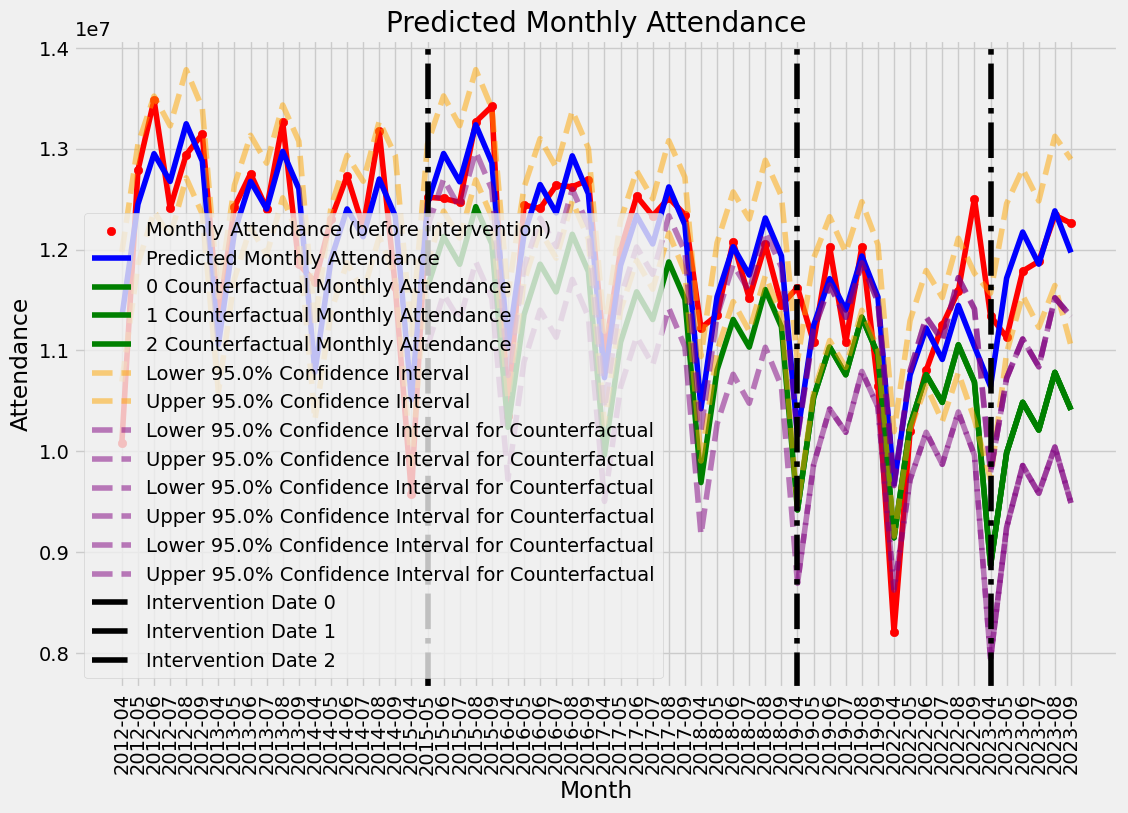

In [21]:
its_periodical_OLS.plot_predict(is_counterfactual=True, is_prediction_std=True)

In [23]:
# 使うDFを変える
df_att_remove_covid = Att_Analysis(is_remove_covid=True, is_addup=False).df_monthly_att_all_covid_removed
its_periodical_OLS = ITS(df_att_remove_covid, intervention='2023-04', method='Periodic OLS', period=8, order=3)
its_periodical_OLS.show_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.240
Date:                Mon, 23 Oct 2023   Prob (F-statistic):              0.288
Time:                        18:01:35   Log-Likelihood:                -1211.9
No. Observations:                  73   AIC:                             2444.
Df Residuals:                      63   BIC:                             2467.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.075e+07   1.03e+06     10.442      0.000     8.7e+06    1.28e+07
time since start -2.924e+04   2.74e+04     -1.069      0.289   -8.39e+04    2.54e+04
level change       4.51e+06    3.2e+06      1.411      0.163   -1.88e+06    1.09e+07
slope change     -1.063e+06   8.45e+05     -1.258      0.213   -2.75e+06    6.25e+05
sin(1,8)         -1.321e+06   7.24e+05     -1.826      0.073   -2.77e+06    1.25e+05
sin(2,8)          1.109e+06   7.05e+05      1.572      0.121   -3.01e+05    2.52e+06
sin(3,8)           3.14e+05   7.05e+05      0.445      0.658   -1.09e+06    1.72e+06
cos(1,8)         -5.582e+05   7.13e+05     -0.783      0.436   -1.98e+06    8.66e+05
cos(2,8)         -6.591e+05      7e+05     -0.941      0.350   -2.06e+06     7.4e+05
cos(3,8)           -6.1e+05   6.96e+05     -0.877      0.384      -2e+06    7.81e+05
==============================================================================
Omnibus:                       13.868   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.864
Skew:                          -1.133   Prob(JB):                     0.000359
Kurtosis:                       3.284   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

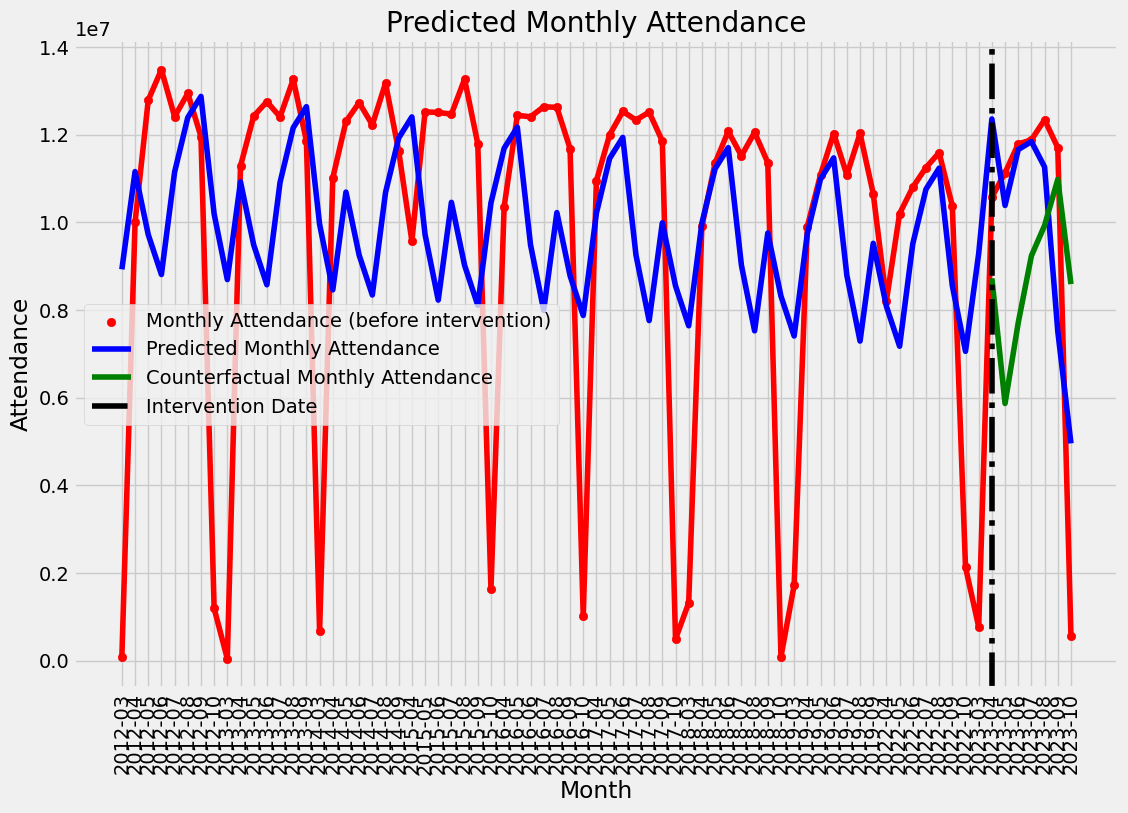

In [24]:
its_periodical_OLS.plot_predict(is_counterfactual=True)